In [255]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [26]:
def read_data(file_paths):
    data_frames = []
    for path in file_paths:
        df = pd.read_csv(path)
        data_frames.append(df)
    return pd.concat(data_frames, ignore_index=True)

In [132]:
file_paths_sex = ['./results/results9/Run1_TPR_sex.csv', './results/results21/Run2_TPR_sex.csv', './results/results25/Run3_TPR_sex.csv', './results/results35/Run4_TPR_sex.csv', './results/results42/Run5_TPR_sex.csv']  # Add more file paths as needed
file_paths_age = ['./results/results9/Run1_TPR_age_decile.csv', './results/results21/Run2_TPR_age_decile.csv', './results/results25/Run3_TPR_age_decile.csv', './results/results35/Run4_TPR_age_decile.csv', './results/results42/Run5_TPR_age_decile.csv']  # Add more file paths as needed


In [133]:
data_sex = read_data(file_paths_sex)
data_age = read_data(file_paths_age)

In [134]:
data_age

,Category,Total,Positive,Negative,GAP,Percentage
0,40-60,"[1018, 1018, 1018, 1018]","[118, 45, 155, 863]","[900, 973, 863, 155]","[0.05084745762711865, 0.0, 0.07741935483870968...","[0.3105263157894737, 0.24725274725274726, 0.28..."
1,60-80,"[1688, 1688, 1688, 1688]","[196, 87, 269, 1419]","[1492, 1601, 1419, 269]","[0.04591836734693878, 0.0, 0.05576208178438661...","[0.5157894736842106, 0.47802197802197804, 0.50..."
2,80+,"[415, 415, 415, 415]","[47, 33, 76, 339]","[368, 382, 339, 76]","[0.0425531914893617, 0.0, 0.09210526315789473,...","[0.12368421052631579, 0.1813186813186813, 0.14..."
3,20-40,"[281, 281, 281, 281]","[19, 17, 36, 245]","[262, 264, 245, 36]","[0.10526315789473684, 0.0, 0.08333333333333333...","[0.05, 0.09340659340659341, 0.0671641791044776..."
4,0-20,"[1, 1, 1, 1]","[0, 0, 0, 1]","[1, 1, 1, 0]","[0, 0, 0, 1.0]","[0.0, 0.0, 0.0, 0.0003487966515521451]"
5,60-80,"[1654, 1654, 1654, 1654]","[176, 102, 265, 1389]","[1478, 1552, 1389, 265]","[1.0, 0.0, 0.8943396226415095, 0.1216702663786...","[0.4631578947368421, 0.5604395604395604, 0.494..."
6,20-40,"[267, 267, 267, 267]","[21, 7, 26, 241]","[246, 260, 241, 26]","[1.0, 0.0, 0.9615384615384616, 0.1410788381742...","[0.05526315789473684, 0.038461538461538464, 0...."
7,40-60,"[1035, 1035, 1035, 1035]","[129, 54, 175, 860]","[906, 981, 860, 175]","[1.0, 0.0, 0.8457142857142858, 0.1209302325581...","[0.3394736842105263, 0.2967032967032967, 0.326..."
8,80+,"[439, 439, 439, 439]","[50, 19, 66, 373]","[389, 420, 373, 66]","[1.0, 0.0, 0.8939393939393939, 0.1367292225201...","[0.13157894736842105, 0.1043956043956044, 0.12..."
9,0-20,"[8, 8, 8, 8]","[4, 0, 4, 4]","[4, 8, 4, 4]","[1.0, 0, 1.0, 0.25]","[0.010526315789473684, 0.0, 0.0074626865671641..."


In [135]:
diseases = ['slvh', 'dlv', 'composite', 'no_finding']

In [136]:
# Function to safely evaluate strings containing lists
def safe_eval_list(data_str):
    try:
        return eval(data_str)
    except:
        return [None] * len(diseases)  # If eval fails, provide a list of None values

# Adjust the expand_data function to handle the string representation of lists in data_age
def expand_data(row, category_name):
    expanded_rows = []
    # Safely evaluate the strings to lists
    total = safe_eval_list(row['Total'])
    positive = safe_eval_list(row['Positive'])
    negative = safe_eval_list(row['Negative'])
    gap = safe_eval_list(row['GAP'])
    percentage = safe_eval_list(row['Percentage'])
    
    for i, disease in enumerate(diseases):
        # Use directly the list values
        expanded_row = {
            'Category': category_name,
            'Disease': disease,
            'Total': total[i],
            'Positive': positive[i],
            'Negative': negative[i],
            'GAP': gap[i],
            'Percentage': percentage[i]
        }
        expanded_rows.append(expanded_row)
        print(expanded_row)
    return expanded_rows

In [137]:
# Apply the expansion to age dataset
expanded_data_sex = [expand_data(row, row['Category']) for index, row in data_sex.iterrows()]

# Flatten the list of lists into a single list of dictionaries
expanded_data_sex = [item for sublist in expanded_data_sex for item in sublist]

# Convert list to DataFrame
expanded_df_sex = pd.DataFrame(expanded_data_sex)

# Display the new structure of the age data
expanded_df_sex

{'Category': 'F', 'Disease': 'slvh', 'Total': 1632, 'Positive': 178, 'Negative': 1454, 'GAP': 0.07303370786516854, 'Percentage': 0.46842105263157896}
{'Category': 'F', 'Disease': 'dlv', 'Total': 1632, 'Positive': 101, 'Negative': 1531, 'GAP': 0.0, 'Percentage': 0.554945054945055}
{'Category': 'F', 'Disease': 'composite', 'Total': 1632, 'Positive': 258, 'Negative': 1374, 'GAP': 0.10465116279069768, 'Percentage': 0.48134328358208955}
{'Category': 'F', 'Disease': 'no_finding', 'Total': 1632, 'Positive': 1374, 'Negative': 258, 'GAP': 0.9614264919941776, 'Percentage': 0.47924659923264734}
{'Category': 'M', 'Disease': 'slvh', 'Total': 1771, 'Positive': 202, 'Negative': 1569, 'GAP': 0.0297029702970297, 'Percentage': 0.531578947368421}
{'Category': 'M', 'Disease': 'dlv', 'Total': 1771, 'Positive': 81, 'Negative': 1690, 'GAP': 0.0, 'Percentage': 0.44505494505494503}
{'Category': 'M', 'Disease': 'composite', 'Total': 1771, 'Positive': 278, 'Negative': 1493, 'GAP': 0.03597122302158273, 'Percentag

,Category,Disease,Total,Positive,Negative,GAP,Percentage
0,F,slvh,1632,178,1454,0.073034,0.468421
1,F,dlv,1632,101,1531,0.000000,0.554945
2,F,composite,1632,258,1374,0.104651,0.481343
3,F,no_finding,1632,1374,258,0.961426,0.479247
4,M,slvh,1771,202,1569,0.029703,0.531579
5,M,dlv,1771,81,1690,0.000000,0.445055
6,M,composite,1771,278,1493,0.035971,0.518657
7,M,no_finding,1771,1493,278,0.963161,0.520753
8,F,slvh,1672,154,1518,1.000000,0.405263
9,F,dlv,1672,118,1554,0.000000,0.648352


In [138]:
# Apply the expansion to age dataset
expanded_data_age = [expand_data(row, row['Category']) for index, row in data_age.iterrows()]

# Flatten the list of lists into a single list of dictionaries
expanded_data_age = [item for sublist in expanded_data_age for item in sublist]

# Convert list to DataFrame
expanded_df_age = pd.DataFrame(expanded_data_age)

# Display the new structure of the age data
expanded_df_age

{'Category': '40-60', 'Disease': 'slvh', 'Total': 1018, 'Positive': 118, 'Negative': 900, 'GAP': 0.05084745762711865, 'Percentage': 0.3105263157894737}
{'Category': '40-60', 'Disease': 'dlv', 'Total': 1018, 'Positive': 45, 'Negative': 973, 'GAP': 0.0, 'Percentage': 0.24725274725274726}
{'Category': '40-60', 'Disease': 'composite', 'Total': 1018, 'Positive': 155, 'Negative': 863, 'GAP': 0.07741935483870968, 'Percentage': 0.2891791044776119}
{'Category': '40-60', 'Disease': 'no_finding', 'Total': 1018, 'Positive': 863, 'Negative': 155, 'GAP': 0.9652375434530707, 'Percentage': 0.30101151028950124}
{'Category': '60-80', 'Disease': 'slvh', 'Total': 1688, 'Positive': 196, 'Negative': 1492, 'GAP': 0.04591836734693878, 'Percentage': 0.5157894736842106}
{'Category': '60-80', 'Disease': 'dlv', 'Total': 1688, 'Positive': 87, 'Negative': 1601, 'GAP': 0.0, 'Percentage': 0.47802197802197804}
{'Category': '60-80', 'Disease': 'composite', 'Total': 1688, 'Positive': 269, 'Negative': 1419, 'GAP': 0.0557

,Category,Disease,Total,Positive,Negative,GAP,Percentage
0,40-60,slvh,1018,118,900,0.050847,0.310526
1,40-60,dlv,1018,45,973,0.000000,0.247253
2,40-60,composite,1018,155,863,0.077419,0.289179
3,40-60,no_finding,1018,863,155,0.965238,0.301012
4,60-80,slvh,1688,196,1492,0.045918,0.515789
...,...,...,...,...,...,...,...
95,20-40,no_finding,536,468,68,0.457265,0.143779
96,0-20,slvh,31,0,31,0.000000,0.000000
97,0-20,dlv,31,0,31,0.000000,0.000000
98,0-20,composite,31,0,31,0.000000,0.000000


In [139]:
def group_and_describe(data, group_field, summary_fields):
    grouped = data.groupby(group_field)
    summary = grouped[summary_fields].describe()
    return summary

def compute_confidence_intervals(df, mean_name, std_name, count_name, z=1.96):
    return df[mean_name], df[std_name] * z / np.sqrt(df[count_name])

def create_summary_df(diseases, data, gender):
    df_list = []
    for disease in diseases:
        mean = data.loc[disease, ('Gap_' + gender, 'mean')]
        ci = compute_confidence_intervals(data.loc[disease], ('Gap_' + gender, 'mean'), ('Gap_' + gender, 'std'), ('Gap_' + gender, 'count'))
        percentage_mean = data.loc[disease, ('%' + gender, 'mean')]
        df_list.append({'Disease': disease, 'Mean Gap': mean, 'CI': ci, '%': percentage_mean})
    return pd.DataFrame(df_list)


In [140]:
# Function to compute descriptive statistics and confidence intervals
def group_and_describe(data):
    grouped = data.groupby('Disease')
    description = grouped['GAP'].describe()
    description['CI'] = 1.96 * description['std'] / np.sqrt(description['count'])  # 95% CI
    return description

# Function to create summary dataframes for plotting
def create_summary_df(description):
    df_list = []
    for index, row in description.iterrows():
        df_list.append({
            'Disease': index,
            'Mean GAP': row['mean'],
            'CI': row['CI'],
            'Count': row['count']
        })
    return pd.DataFrame(df_list)

# Compute statistics for sex data
description_sex = group_and_describe(expanded_df_sex)
summary_df_sex = create_summary_df(description_sex)

# Compute statistics for age data
description_age = group_and_describe(expanded_df_age)
summary_df_age = create_summary_df(description_age)

In [141]:
description_sex

,count,mean,std,min,25%,50%,75%,max,CI
Disease,,,,,,,,,
composite,11.0,0.495734,0.466318,0.0,0.017986,0.563177,0.985553,1.000000,0.275576
dlv,11.0,0.001800,0.005971,0.0,0.000000,0.000000,0.000000,0.019802,0.003528
no_finding,11.0,0.429202,0.462240,0.0,0.002264,0.248100,0.962294,1.000000,0.273166
slvh,11.0,0.437888,0.487545,0.0,0.002646,0.073034,0.977273,1.000000,0.288121


In [142]:
summary_df_sex

,Disease,Mean GAP,CI,Count
0,composite,0.495734,0.275576,11.0
1,dlv,0.001800,0.003528,11.0
2,no_finding,0.429202,0.273166,11.0
3,slvh,0.437888,0.288121,11.0


In [143]:
description_age

,count,mean,std,min,25%,50%,75%,max,CI
Disease,,,,,,,,,
composite,25.0,0.540068,0.371481,0.0,0.092105,0.572165,0.893939,1.000000,0.145620
dlv,25.0,0.000948,0.003417,0.0,0.000000,0.000000,0.000000,0.015152,0.001339
no_finding,25.0,0.453297,0.322568,0.0,0.178947,0.420147,0.619169,1.000000,0.126446
slvh,25.0,0.451409,0.380049,0.0,0.050847,0.394366,0.781250,1.000000,0.148979


In [144]:
summary_df_age

,Disease,Mean GAP,CI,Count
0,composite,0.540068,0.145620,25.0
1,dlv,0.000948,0.001339,25.0
2,no_finding,0.453297,0.126446,25.0
3,slvh,0.451409,0.148979,25.0


In [271]:
def plot_age_disparity_size_corrected(plot_data, age_categories, disease_names, title):
    plt.figure(figsize=(18, 6))
    color_map = ['orange', 'green', 'red', 'purple', 'blue']  # Colors for each age category

    data_for_df = []

    # Ensuring we have enough markers and colors
    if len(color_map) < len(age_categories):
        raise ValueError("Not enough markers or colors specified for the number of age categories.")
    
    total_counts = {age: plot_data[age]['Total'].sum() for age in age_categories}
    sorted_ages = sorted(total_counts.items(), key=lambda x: x[1], reverse=True)

    for i, (age, _) in enumerate(sorted_ages):
        data = plot_data[age]
        for disease in disease_names:
            disease_data = data[data['Disease'] == disease]

            mean_gap = disease_data['GAP'].mean()
            std_gap = disease_data['GAP'].std() / np.sqrt(disease_data['Positive'].sum())
            
            total_size = disease_data['Total'].sum()

            # Append the metrics for DataFrame
            data_for_df.append({
                'Disease': disease,
                'Age Group': age,
                'Mean GAP': mean_gap,
                'STD GAP': std_gap,
                'Total': total_size
            })
            
            plt.scatter(disease, mean_gap, color=color_map[i],s=total_size/(3403 *len(sorted_ages))* 250, 
                         label=f"{age}" if disease == disease_names[0] else "")
            
            plt.errorbar(disease,mean_gap,yerr=1.96 * std_gap,color=color_map[i])

    # Creating DataFrame
    pd.DataFrame(data_for_df).to_csv(f"./results/{title}_Stats.csv", index=False)

    plt.xlabel("Disease Label")
    plt.xticks(rotation=45)
    plt.ylabel(f"TPR {title} Disparity")
    plt.legend(title=title, bbox_to_anchor=(1.1, 1), fontsize='x-large', markerscale=0.9, title_fontsize='x-large')
    plt.grid(True)
    plt.title(label=f"TPR Disparity by {title} Across Diseases (Size Proportional to Total Cases)")
    plt.savefig(f"./results/{title}_TPRDisp.pdf")
    plt.show()

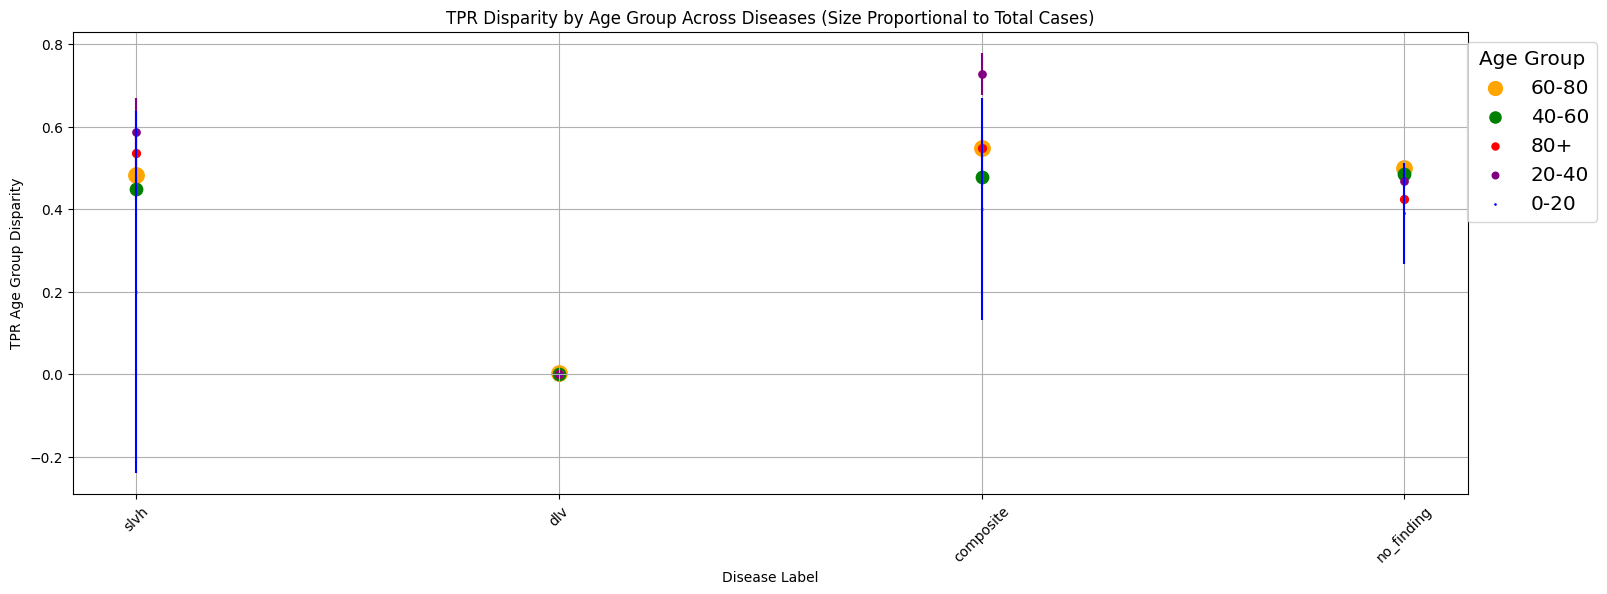

In [272]:
age_categories = expanded_df_age['Category'].unique()
disease_names = expanded_df_age['Disease'].unique()

# Preparing the data for plotting
plot_data = {age: expanded_df_age[expanded_df_age['Category'] == age] for age in age_categories}

plot_age_disparity_size_corrected(plot_data, age_categories, disease_names, "Age Group")

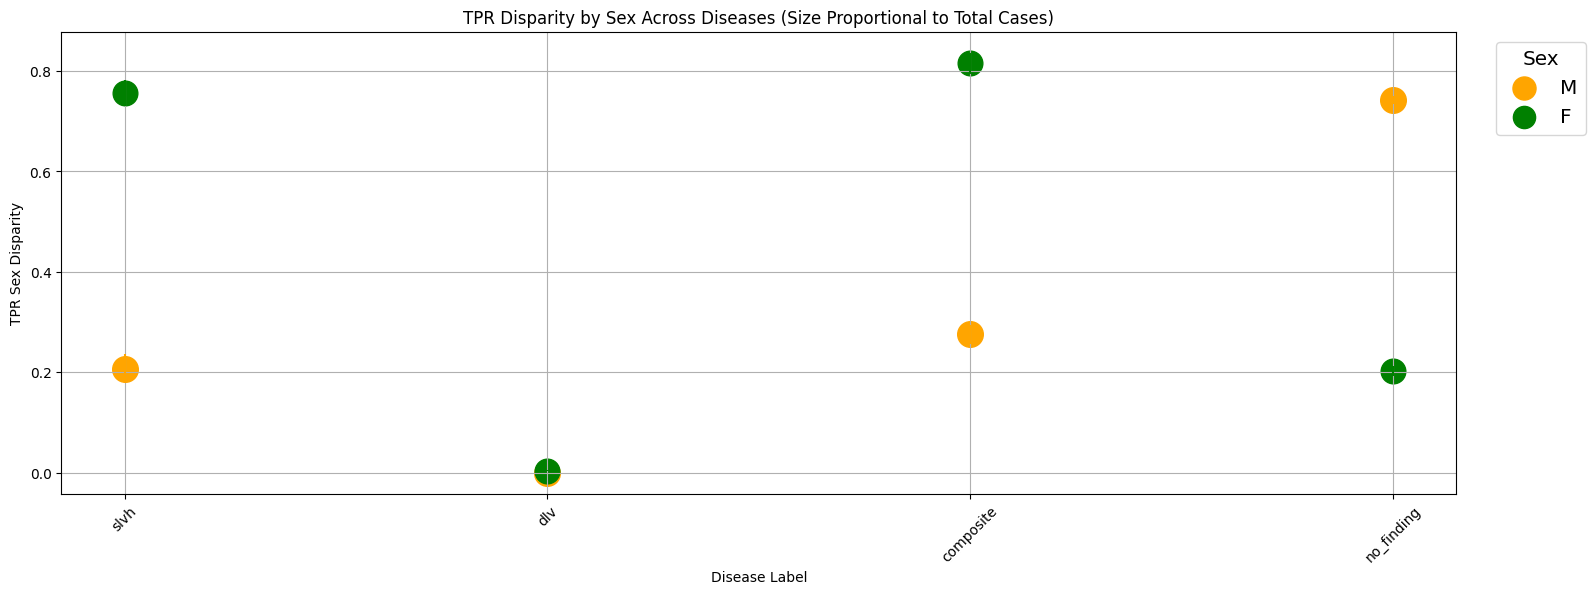

In [264]:
expanded_df_sex.dropna(subset=['Category'], inplace=True)
expanded_df_sex['GAP'] = pd.to_numeric(expanded_df_sex['GAP'], errors='coerce').fillna(0)
expanded_df_sex['Total'] = pd.to_numeric(expanded_df_sex['Total'], errors='coerce').fillna(0)

sex_categories = expanded_df_sex['Category'].unique()
disease_names = expanded_df_sex['Disease'].unique()

# Preparing the data for plotting
plot_data = {sex: expanded_df_sex[expanded_df_sex['Category'] == sex] for sex in sex_categories}

plot_age_disparity_size_corrected(plot_data, sex_categories, disease_names, "Sex")

In [293]:
correlation ={}
P ={}

In [294]:
def get_stats(new_stats, correlation, P):

    names = {
        "M": "Male",
        "F": "Female"
    }

    # Group data by 'Age Group' and calculate correlation within each group
    for group in new_stats['Age Group'].unique():
        subgroup_data = new_stats[(new_stats['Age Group'] == group)]
        
        # Calculate Pearson correlation for Mean GAP and STD GAP within each age group
        corr, p_value = stats.pearsonr(subgroup_data['Mean GAP'], subgroup_data['STD GAP'])
        
        # Formatting the group name for display
        group_name = names[group] if group in names else group
        correlation[group_name] = round(corr, 4)
        P[group_name] = round(p_value, 4)
        
        print(f"{group_name} has a correlation of {corr} and p-value of {p_value}")

In [295]:
sex_stats = pd.read_csv("./results/Sex_Stats.csv")

get_stats(sex_stats, correlation, P)

sex_stats

Male has a correlation of -0.0073657303236430716 and p-value of 0.992634269676357
Female has a correlation of 0.9638511890881855 and p-value of 0.03614881091181443


,Disease,Age Group,Mean GAP,STD GAP,Total
0,slvh,M,0.206999,0.014581,9258
1,dlv,M,0.000000,0.000000,9258
2,composite,M,0.275463,0.009991,9258
3,no_finding,M,0.741957,0.003915,9258
4,slvh,F,0.756354,0.013518,8585
5,dlv,F,0.003960,0.000355,8585
6,composite,F,0.815152,0.010940,8585
7,no_finding,F,0.202288,0.004984,8585


In [296]:
# Load the dataset
age_stats = pd.read_csv("./results/Age Group_Stats.csv")

get_stats(age_stats, correlation, P)

age_stats


60-80 has a correlation of 0.7447901231346679 and p-value of 0.25520987686533214
40-60 has a correlation of 0.733396985844983 and p-value of 0.2666030141550171
80+ has a correlation of 0.8959262315664919 and p-value of 0.10407376843350802
20-40 has a correlation of 0.7715107541172794 and p-value of 0.22848924588272057
0-20 has a correlation of 0.3506243230396476 and p-value of 0.6493756769603525


,Disease,Age Group,Mean GAP,STD GAP,Total
0,slvh,60-80,0.482651,0.012561,8343
1,dlv,60-80,0.003030,0.000313,8343
2,composite,60-80,0.547489,0.009227,8343
3,no_finding,60-80,0.499794,0.003932,8343
4,slvh,40-60,0.449723,0.014358,5394
5,dlv,40-60,0.001709,0.000199,5394
6,composite,40-60,0.477524,0.010977,5394
7,no_finding,40-60,0.485128,0.004619,5394
8,slvh,80+,0.536952,0.021246,2159
9,dlv,80+,0.000000,0.000000,2159


In [297]:
correlation

{'Male': -0.0074,
 'Female': 0.9639,
 '60-80': 0.7448,
 '40-60': 0.7334,
 '80+': 0.8959,
 '20-40': 0.7715,
 '0-20': 0.3506}

In [298]:
P

{'Male': 0.9926,
 'Female': 0.0361,
 '60-80': 0.2552,
 '40-60': 0.2666,
 '80+': 0.1041,
 '20-40': 0.2285,
 '0-20': 0.6494}

In [319]:
# Pivoting the table to match the required format
pivoted_df = sex_stats.pivot(index="Disease", columns="Age Group", values=["Mean GAP", "STD GAP", "Total"])

# Confidence intervals for M
pivoted_df['CI_M'] = pivoted_df[('Mean GAP', 'M')].apply(
    lambda x: stats.norm.interval(0.95, loc=x, scale=pivoted_df[('STD GAP', 'M')]/pivoted_df[('Total', 'M')].apply(lambda n: n**0.5))
)

# Confidence intervals for F
pivoted_df['CI_F'] = pivoted_df[('Mean GAP', 'F')].apply(
    lambda x: stats.norm.interval(0.95, loc=x, scale=pivoted_df[('STD GAP', 'F')]/pivoted_df[('Total', 'F')].apply(lambda n: n**0.5))
)

# Creating the final table with specified headers
final_table = pivoted_df.reset_index()
final_table.columns = ['Disease', 'Gap_M_mean', 'Gap_F_mean', 'CI_M', 'CI_F', 'Total_M', 'Total_F', 'CI_M', 'CI_F']

# Display the final structured DataFrame
sex_table_stats = final_table[['Disease', 'Gap_M_mean', 'CI_M', 'Gap_F_mean', 'CI_F']]

sex_table_stats['Distance'] = sex_table_stats.apply(lambda row: abs(row['Gap_M_mean'] - row['Gap_F_mean']), axis=1)
round(sex_table_stats,3)


/Users/sejalgupta/Library/Python/3.9/lib/python/site-packages/scipy/stats/_distn_infrastructure.py:2241: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/Users/sejalgupta/Library/Python/3.9/lib/python/site-packages/scipy/stats/_distn_infrastructure.py:2242: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
/var/folders/3g/dkd_j4g50wv1bvsfzqwsn5n40000gn/T/ipykernel_17798/3385550678.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sex_table_stats['Distance'] = sex_table_stats.apply(lambda row: abs(row['Gap_M_mean'] - row['Gap_F_mean']), axis=1)


,Disease,Gap_M_mean,CI_M,CI_M,Gap_F_mean,CI_F,CI_F,Distance
0,composite,0.815,0.011,"([0.27525991234013636, nan, 0.2753836687808518...",0.275,0.010,"([0.8149202111928882, 0.8151441197005266, 0.81...",0.540
1,dlv,0.004,0.000,"([-0.00020351414245343969, nan, -7.97577017379...",0.000,0.000,"([0.003728982413744561, 0.00395289092138301, 0...",0.004
2,no_finding,0.202,0.005,"([0.7417537538220109, nan, 0.7418775102627264,...",0.742,0.004,"([0.20205643748209276, 0.20228034598973121, 0....",0.540
3,slvh,0.756,0.014,"([0.20679528097515357, nan, 0.206919037415869,...",0.207,0.015,"([0.7561224076830809, 0.7563463161907193, 0.75...",0.549


In [338]:
print("Average Distance:",round(sex_table_stats["Distance"].mean(),3))
print("Count female with positive gap:",len(sex_table_stats.loc[(sex_table_stats.Gap_F_mean >= 0)]))
print("Count male with positive gap  :",len(sex_table_stats.loc[(sex_table_stats.Gap_M_mean >= 0)]))

Average Distance: 0.408
Count female with positive gap: 4
Count male with positive gap  : 4


In [333]:
# Pivoting the table to match the required format
pivoted_df = age_stats.pivot(index="Disease", columns="Age Group", values=["Mean GAP", "STD GAP", "Total"])

# Calculate confidence intervals
for age in ['60-80', '40-60', '80+', '20-40', '0-20']:
    mean_col = ('Mean GAP', age)
    std_col = ('STD GAP', age)
    total_col = ('Total', age)
    ci_col = 'CI_' + age
    z_score = stats.norm.ppf(0.975)  # for a 95% confidence interval
    pivoted_df[ci_col] = pivoted_df.apply(lambda row: (row[mean_col] - z_score * (row[std_col] / np.sqrt(row[total_col])),
                                                      row[mean_col] + z_score * (row[std_col] / np.sqrt(row[total_col]))), axis=1)

# If it's a MultiIndex, you can flatten it like this:
flat_columns = ['Disease'] + ['_'.join(col).strip() for col in pivoted_df.columns.to_flat_index()]


age_final_table = pivoted_df.reset_index()
age_final_table.columns = flat_columns


# Identifying columns that contain the mean values, assumed to be named 'Gap_*_mean'
mean_columns = [col for col in age_final_table.columns if 'Mean' in col]

# Calculate the 'Distance' by taking the max and min across these mean columns for each row
age_final_table['Distance'] = age_final_table[mean_columns].apply(lambda row: row.max() - row.min(), axis=1)
round(age_final_table, 3)


,Disease,Mean GAP_0-20,Mean GAP_20-40,Mean GAP_40-60,Mean GAP_60-80,Mean GAP_80+,STD GAP_0-20,STD GAP_20-40,STD GAP_40-60,STD GAP_60-80,...,Total_20-40,Total_40-60,Total_60-80,Total_80+,CI_60-80_,CI_40-60_,CI_80+_,CI_20-40_,CI_0-20_,Distance
0,composite,0.40,0.727,0.478,0.547,0.548,0.137,0.026,0.011,0.009,...,1883.0,5394.0,8343.0,2159.0,"(0.5472911636888304, 0.5476871675103007)","(0.4772313904437139, 0.47781725036817435)","(0.5471623397711591, 0.5485104250285406)","(0.7263062316469308, 0.7286764548187713)","(0.36645260980530336, 0.4335473901946967)",0.327
1,dlv,0.00,0.000,0.002,0.003,0.000,0.000,0.000,0.000,0.000,...,1883.0,5394.0,8343.0,2159.0,"(0.0030235891806725747, 0.003037016879933425)","(0.0017040915375903434, 0.0017147118812130568)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)",0.003
2,no_finding,0.39,0.468,0.485,0.500,0.424,0.062,0.008,0.005,0.004,...,1883.0,5394.0,8343.0,2159.0,"(0.4997097910974118, 0.49987855193899416)","(0.485004783826796, 0.48525133332312975)","(0.4232562391852336, 0.42389380862740345)","(0.467823025669518, 0.46858722359498)","(0.37448985108094085, 0.4050800413921774)",0.110
3,slvh,0.20,0.588,0.450,0.483,0.537,0.224,0.041,0.014,0.013,...,1883.0,5394.0,8343.0,2159.0,"(0.48238130724022177, 0.482920385499386)","(0.44933987573056183, 0.4501062282557449)","(0.5360561180071322, 0.5378485050143784)","(0.5858661751220212, 0.589572421369207)","(0.14521734121396365, 0.25478265878603634)",0.388


In [341]:
age_final_table.to_csv("age_table.csv")

In [339]:
age_final_table["STD GAP_80+"]

0    0.015980
1    0.000000
2    0.007557
3    0.021246
Name: STD GAP_80+, dtype: float64

In [337]:
print("Average Distance:",round(age_final_table["Distance"].mean(),3))
print("Count 40-60 with positive gap:",len(age_final_table.loc[(age_final_table['Mean GAP_40-60'] >= 0)]))
print("Count 60-80 with positive gap:",len(age_final_table.loc[(age_final_table['Mean GAP_60-80'] >= 0)]))
print("Count 20-40 with positive gap:",len(age_final_table.loc[(age_final_table['Mean GAP_20-40'] >= 0)]))
print("Count 80- with positive gap:",len(age_final_table.loc[(age_final_table['Mean GAP_80+'] >= 0)]))
print("Count 0-20 with positive gap:",len(age_final_table.loc[(age_final_table['Mean GAP_0-20'] >= 0)]))

Average Distance: 0.207
Count 40-60 with positive gap: 4
Count 60-80 with positive gap: 4
Count 20-40 with positive gap: 4
Count 80- with positive gap: 4
Count 0-20 with positive gap: 4
